In [6]:
!pip install yfinance

In [1]:
 import yfinance as yf

In [2]:
tesla = yf.Ticker("TSLA")

In [3]:
tesla_data=tesla.history(period="max")

In [4]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [28]:
# Downloading the webpage and storing it as html_data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [29]:
# Parsing the html data using beautiful_soup
soup = BeautifulSoup(html_data, 'html.parser')

In [30]:
# Extracting the table with Tesla Quarterly Revenue and storing it into a dataframe named tesla_revenue
tesla_revenue = pd.read_html(str(soup.find_all('table')[1]), header=0)[0]


In [32]:
# Renaming the columns to match the expected output
tesla_revenue = tesla_revenue.rename(columns={'Unnamed: 0': 'Date', 'Revenue (in millions)': 'Revenue'})



In [38]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Tesla Quarterly Revenue(Millions of US $).1'] != ""]

In [39]:
tesla_revenue.tail()

,Tesla Quarterly Revenue(Millions of US $),Tesla Quarterly Revenue(Millions of US $).1
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [40]:
# Creating a ticker object for GameStop with ticker symbol GME
gme_ticker = yf.Ticker("GME")

# Extracting stock information and saving it in a dataframe named gme_data
gme_data = gme_ticker.history(period="max")

In [41]:
# Resetting the index of gme_data
gme_data.reset_index(inplace=True)

In [42]:

# Displaying the first five rows of gme_data
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [43]:
# Downloading the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

# Parsing the html data using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Extracting the GameStop Quarterly Revenue table
gme_revenue_table = soup.find_all("table")[1]

In [44]:
# Converting the table to a dataframe using pandas read_html function
gme_revenue = pd.read_html(str(gme_revenue_table))[0]

In [47]:
# Displaying the last five rows of the gme_revenue dataframe
print(gme_revenue.tail())

   GameStop Quarterly Revenue(Millions of US $)  \
57                                   2006-01-31   
58                                   2005-10-31   
59                                   2005-07-31   
60                                   2005-04-30   
61                                   2005-01-31   

   GameStop Quarterly Revenue(Millions of US $).1  
57                                         $1,667  
58                                           $534  
59                                           $416  
60                                           $475  
61                                           $709  


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
def make_graph(stock_data, revenue_data, stock_name):
    # Creating a figure and axis object using subplots() function
    fig, ax = plt.subplots(figsize=(15,8))
    
    # Plotting the stock data
    sns.lineplot(x="Date", y="Close", data=stock_data, ax=ax, color='blue')
    
    # Setting the x-label as Date
    ax.set_xlabel("Date",fontsize=14)
    
    # Setting the y-label as Close Price
    ax.set_ylabel("Close Price ($)",fontsize=14)
    
    # Setting the title of the graph
    ax.set_title(f"{stock_name} Stock Price (2015-2021)",fontsize=18)
    
    # Adding the revenue data to the graph as a bar plot
    ax2 = ax.twinx()
    sns.barplot(x="Date", y="Revenue", data=revenue_data, ax=ax2, color='gray', alpha=0.5)
    
    # Setting the y-label as Revenue
    ax2.set_ylabel("Revenue ($ Billion)",fontsize=14)
    
    # Setting the legend for the revenue bar plot
    ax2.legend(["Revenue"], loc="upper left")
    
    # Rotating the x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Displaying the graph
    plt.show()

ValueError: Could not interpret input 'Date'

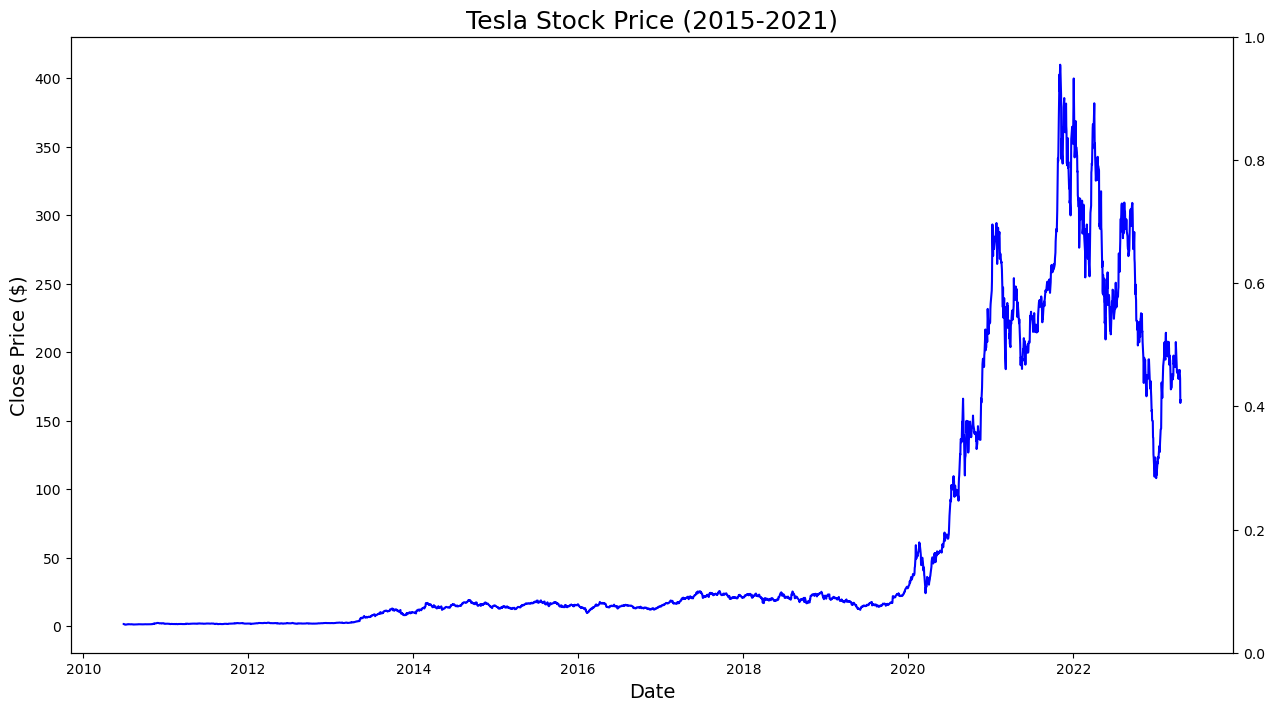

In [50]:
# Calling the make_graph function to plot the Tesla stock data and revenue data
make_graph(tesla_data, tesla_revenue, 'Tesla')


ValueError: Could not interpret input 'Date'

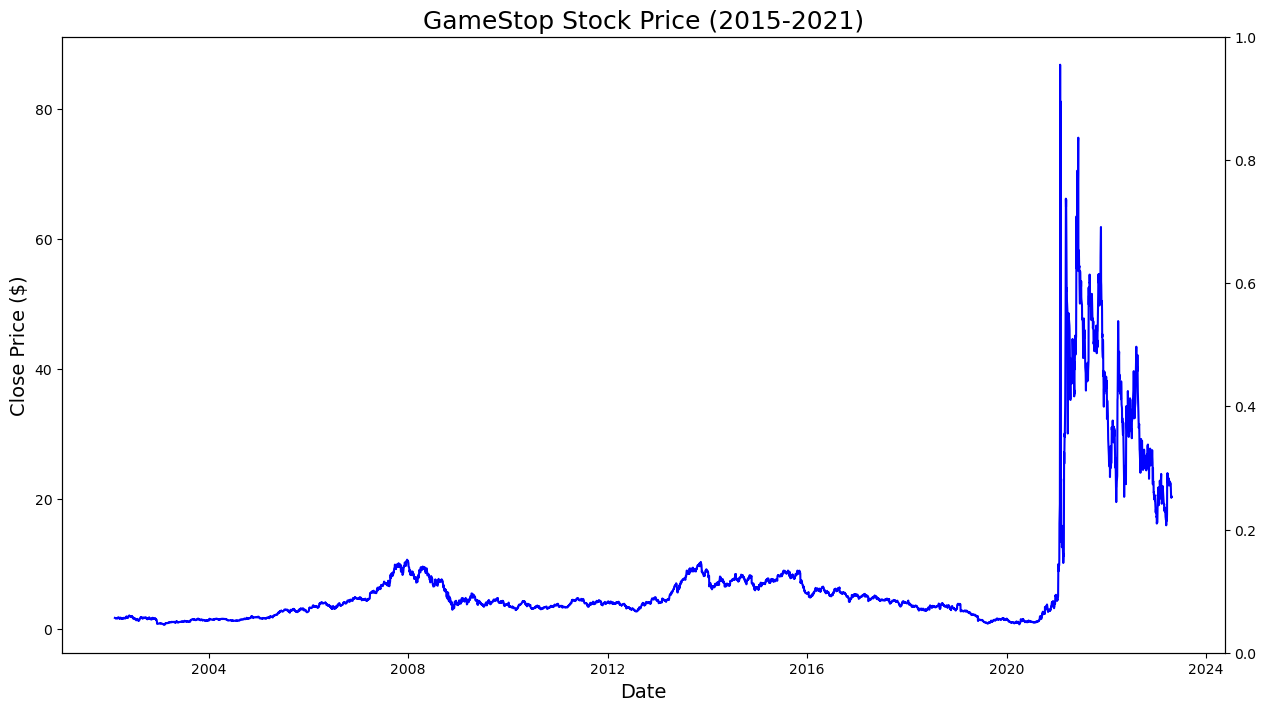

In [51]:
make_graph(gme_data, gme_revenue, 'GameStop')